<!-- # <h1 align = "center"> Révision </h1>

<h4 align = "center"> Dans ce fichier, nous allons effectuer une analyse complète des données.</h2> -->

#  Identification du problème

La première étape de toute analyse consiste à identifier le problème que nous allons étudier. Dans ce fichier, notre problème est de déterminer quels sont les facteurs qui influencent la satisfaction des individus. Pour aborder ce problème, nous formulons plusieurs hypothèses. Par exemple, nous pourrions supposer que le revenu, l'éducation, l'expérience professionnelle et le secteur d'activité ont une influence sur la satisfaction. Pour répondre à ces questions, nous allons effectuer les analyses suivantes :

- Régression linéaire simple : nous allons essayer de prédire la satisfaction en nous basant sur une variable qui présente une relation linéaire avec la satisfaction.
- Régression linéaire multiple : nous allons essayer de prédire la satisfaction en nous basant sur plusieurs variables qui présentent une relation linéaire avec la satisfaction.
- ANOVA (Analyse de la variance) : nous allons utiliser l'ANOVA pour déterminer si les moyennes de satisfaction diffèrent significativement entre différents groupes ou catégories de variables.
- ACP (Analyse en composantes principales) : nous allons utiliser l'ACP pour réduire la dimensionnalité de nos données et identifier les variables qui contribuent le plus à la variation de la satisfaction.
- ACF (Analyse des corrélations fonctionnelles) : nous allons utiliser l'ACF pour étudier les relations fonctionnelles entre les variables et la satisfaction.

# Collection des données

La deuxième étape est généralement la phase de collection des données. Pour cela, nous devons suivre plusieurs étapes :

1. Identification de l'échantillon : Il est essentiel de choisir un échantillon représentatif qui correspond à notre problème d'étude. Cela garantit que les résultats obtenus sont généralisables à la population cible.

2. Collecte des données : La collecte des données peut être réalisée à l'aide de questionnaires, d'entretiens, d'observations, etc. Il est important de collecter un maximum de données pertinentes pour notre analyse.

Dans notre cas, nous utiliserons des données générées par l'IA, juste pour la simplicité.

# Prétraitement des données

La troisième étape consiste au prétraitement des données. Cela implique la suppression des variables perturbantes, le filtrage et la suppression des colonnes indésirables, ainsi que la transformation des données en un format avec lequel nous pouvons travailler.

Pour effectuer le prétraitement des données, nous pouvons utiliser des techniques telles que :

- Nettoyage des données : Suppression des valeurs manquantes, des valeurs aberrantes et des doublons.
- Transformation des données : Normalisation, discrétisation, codage des variables catégorielles, etc.
- Sélection des variables : Identification des variables les plus pertinentes pour notre analyse.

Une fois que nous avons prétraité nos données, nous sommes prêts à passer à l'étape suivante de notre analyse.

Maintenant, on commence notre analyse, d'abord on faire la lecture des données.

- ## Lecture des données

In [58]:
data <- read.csv("data/data.csv", stringsAsFactors = TRUE)
head(data[c(0:length(data))])

,Revenu,Experience,Education,Satisfaction,Secteur,Age
,<int>,<int>,<fct>,<dbl>,<fct>,<int>
1,60000,5,Bachelor,8.5,IT,32
2,75000,8,Master,7.2,Finance,45
3,50000,3,Secondaire,6.0,Ventes,28
4,90000,9,Ph.D.,9.3,Recherche,38
5,120000,11,Bachelor,8.8,Ingénierie,50
6,95000,6,Master,7.5,IT,34


La description des données :
1. **Revenu :** Le revenu en dollars.
2. **Expérience :** Le nombre d'années d'expérience dans le domaine de travail.
3. **Éducation :** Le niveau d'éducation, catégorisé en Secondaire, Bachelor (Licence), Master et Ph.D.
4. **Satisfaction :** Le niveau de satisfaction, mesuré sur une échelle donnée.
5. **Secteur d'activité :** Le secteur d'activité dans lequel la personne travaille.
6. **Âge :** L'âge de la personne.

Dans notre cas, nous avons aucune valeur nulle.

# Analyse Statistique

Maintenant on commence notre Analyse Statistique, et la première chose est de déterminer les types des variables a étudier.

## Types des variables

### **Variables quantitatives :**

  1. Revenu - Quantitative continue (mesurée en dollars).
  2. Expérience - Quantitative discrète (mesurée en années).
  3. Satisfaction - Quantitative continue (mesurée sur une échelle).
  
### **Variables qualitatives :**

  1.  Éducation - Qualitative ordinale (niveau d'éducation catégorisé en Secondaire, Bachelor, Master, Ph.D.).
  2. Secteur - Qualitative nominale (catégorie du secteur d'activité).
  3. Âge - Qualitative ordinale (groupe d'âge).

## Analyse univariée

L'analyse univariée est une étape initiale dans l'exploration des données qui vise à comprendre la distribution et les caractéristiques d'une seule variable à la fois. Elle permet d'obtenir des informations statistiques et des tendances centrales pour une variable donnée, qu'elle soit quantitative ou qualitative.

**Pour les variables quantitatives :**
- **Description générale :** La description d'une variable quantitative implique l'analyse de la tendance centrale, qui est souvent représentée par la moyenne, la médiane et le mode. On examine également la dispersion des données, généralement mesurée par l'écart type.
- **Visualisation :** Pour visualiser une variable quantitative, on utilise généralement des histogrammes, des boîtes à moustaches (box plots) et des diagrammes de densité.

**Pour les variables qualitatives :**
- **Description générale :** Pour les variables qualitatives, l'analyse se concentre sur la fréquence de chaque catégorie. On examine également les proportions et les pourcentages pour avoir une idée de la répartition des catégories.
- **Visualisation :** Les diagrammes en barres (bar plots) et les diagrammes circulaires (pie charts) sont couramment utilisés pour visualiser les variables qualitatives.

Ces analyses univariées fournissent une compréhension approfondie des caractéristiques individuelles des variables, ce qui peut orienter la sélection des méthodes d'analyse statistique plus avancées par la suite.

### Étude d'une variable qualitative (Éducation):

  #### Le tableau de l'effectif :

In [34]:
# Créer un dataframe pour l'analyse univariée
library(tidyverse)
univariate_table <- data %>%
  group_by(Education) %>%
  summarise(
    Effectif = n(),                  # Effectif
    Frequence = n() / nrow(data)     # Fréquence
  )
univariate_table$FCC <- cumsum(univariate_table$Frequence) # Fréquence cumulée croissante
univariate_table$FCD <- rev(cumsum(rev(univariate_table$Frequence))) # Fréquence cumulée décroissante

# Afficher le tableau
as.data.frame(univariate_table)


Education,Effectif,Frequence,FCC,FCD
<fct>,<int>,<dbl>,<dbl>,<dbl>
Bachelor,32,0.2807018,0.2807018,1.0000000
Master,32,0.2807018,0.5614035,0.7192982
Ph.D.,24,0.2105263,0.7719298,0.4385965
Secondaire,26,0.2280702,1.0000000,0.2280702


 #### Représentation graphique :  

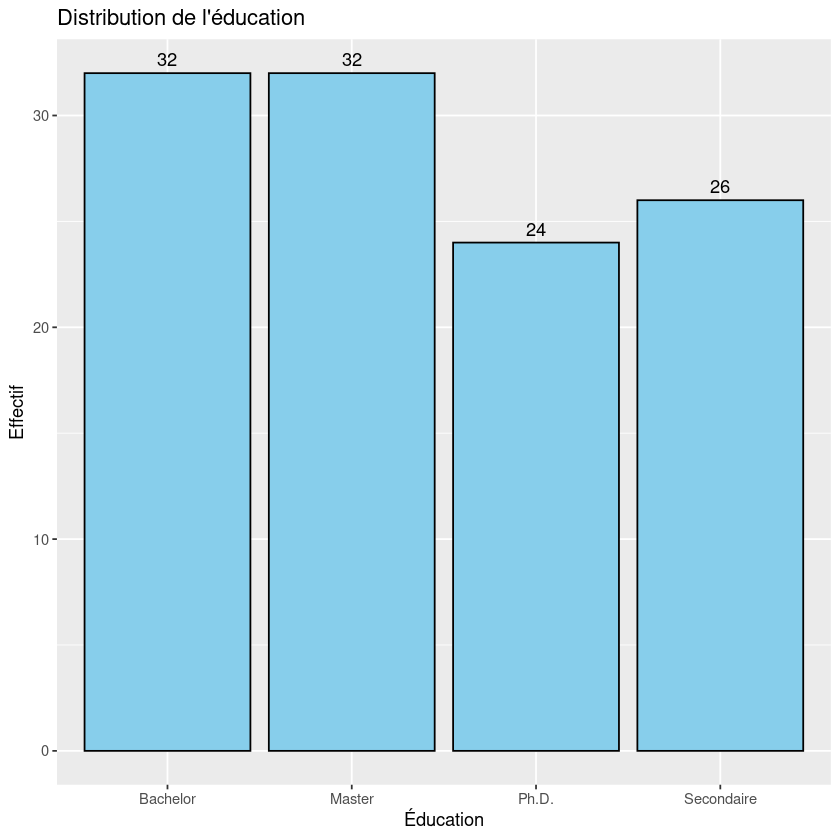

In [32]:
library(ggplot2)

# Créer un bar plot pour la variable 'Education'
ggplot(data, aes(x = Education)) +
  geom_bar(fill = "skyblue", color = "black") +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Distribution de l'éducation",
       x = "Éducation",
       y = "Effectif")


### Étude d'une variable quantitative (Satisfaction)  

 ####  Tendance centrale :

In [40]:
moyenne <- mean(data$Satisfaction)
freq_table <- table(data$Satisfaction)
modes <- as.numeric(names(freq_table[freq_table == max(freq_table)]))
median <- median(data$Satisfaction)
min <- min(data$Satisfaction)
max <- max(data$Satisfaction)

# Affichage des résultats avec print
df <- data.frame(
  Minimum = min,
  Moyenne = moyenne,
  Modes = toString(modes),
  Médiane = median,
  Maximum = max
)
df


Minimum,Moyenne,Modes,Médiane,Maximum
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
5.6,7.90614,8.5,8.25,9.5


Ici on peut voir l’intervalle de variation de la variable Satisfaction, aussi on peut voir que la médiane de 8.25 est proche de la moyenne, suggérant une distribution relativement symétrique. On vérifie ca avec les paramètres de la dispersion.

#### Dispersion :

In [41]:
var <- var(data$Satisfaction)
et <- sd(data$Satisfaction)
df <- data.frame(
  Variance = var,
  Écart_type = et
)
df

Variance,Écart_type
<dbl>,<dbl>
1.204475,1.097486


Les paramètres de la dispersion nous donne des informations sur la distribution des individus et leur dispersion autour de la moyenne, ici on voit que l’écart-type ($\sigma$) n'est pas assez petit que la moyenne ($\bar{X}$), cela peut signifie que nos données ne sont pas très homogènes, et on vérifie ca avec la représentation graphique.

#### Représentation graphique :  
  - Histogramme

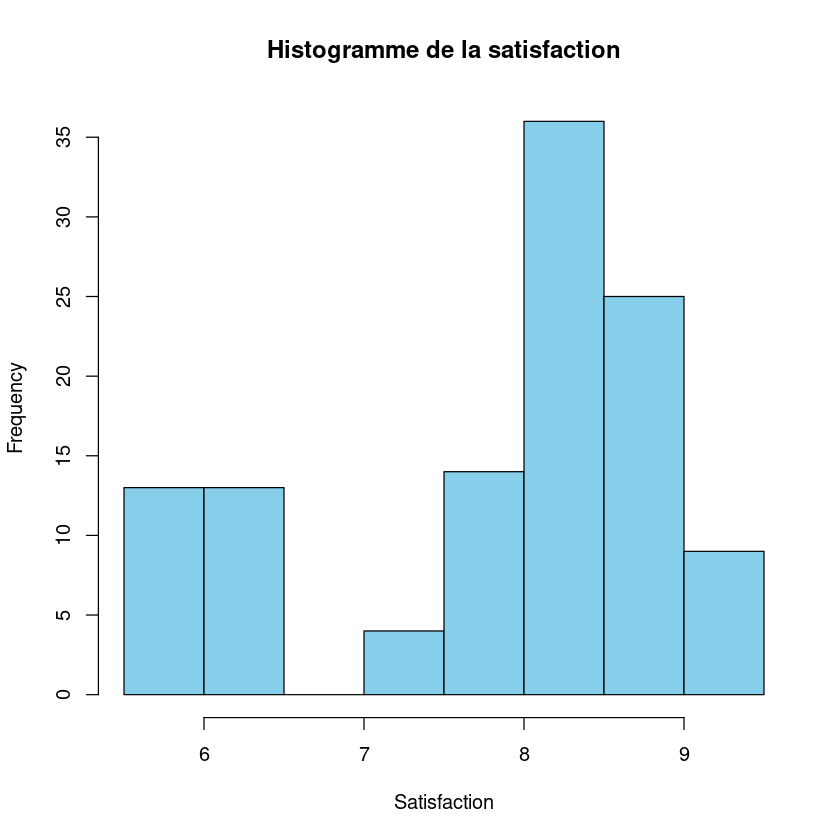

In [54]:
hist(data$Satisfaction,
  breaks = 10, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Histogramme de la satisfaction"
)


Ici on peut clairement voir que la distribution est asymétrique vers le gauche, avec des scores entre 6 et 7 ayant des fréquences plus faibles, et des scores plus que ayant également une fréquence plus faible que 8, mais plus élevée que les valeurs entre 6 et 7.

Une interprétation serait que les participants sont généralement satisfaits, avec une légère majorité étant très satisfaite (score de environs 8), tandis que moins sont extrêmement satisfaits (score autour de 9) ou modérément satisfaits (scores entre 6 et 7).

- Boite a moustache

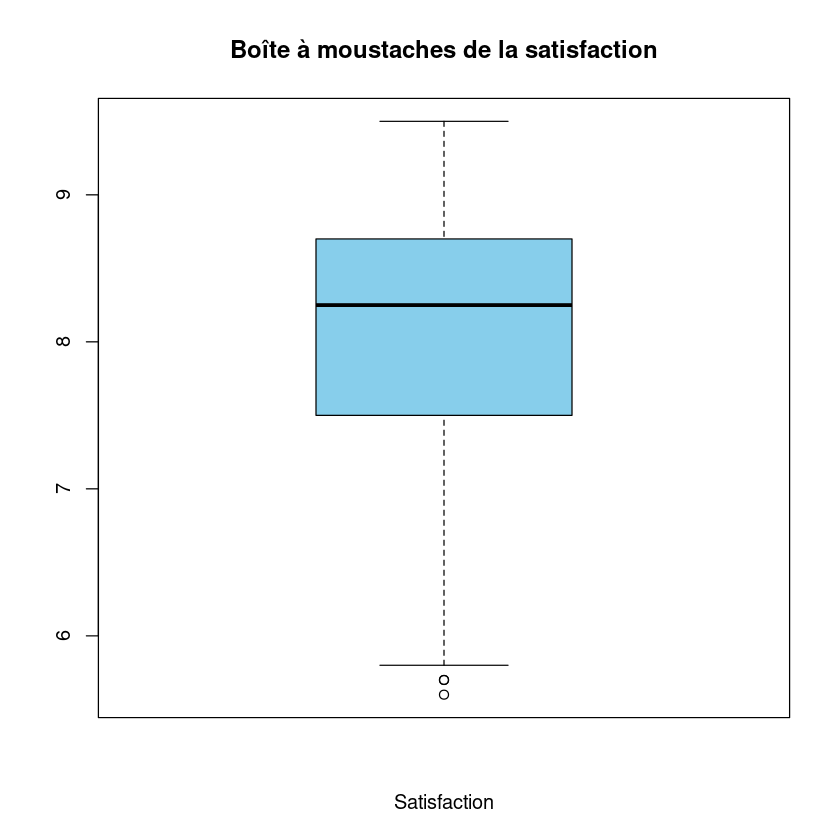

In [55]:
boxplot(data$Satisfaction, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Boîte à moustaches de la satisfaction")

Ce boite a moustache affirme l’asymétrie de notre données, avec la présence des outliers, ils sont les valeurs qui causent l’asymétrie de notre données.

Maintenant qu'on a terminer avec l'analyse univariée, on passe a l'analyse bivairée.

## Analyse bivariée

L'analyse bivariée constitue la prochaine étape logique après l'analyse univariée et se concentre sur les relations entre deux variables à la fois. Elle permet d'explorer les associations, les corrélations et les dépendances entre différentes paires de variables, qu'elles soient quantitatives ou qualitatives.

**Pour les variables quantitatives :**

1. **Régression linéaire simple :** Lorsque l'on souhaite comprendre la relation linéaire entre deux variables quantitatives, la régression linéaire simple est souvent utilisée. Elle permet de modéliser et de prédire la variable dépendante en fonction de la variable indépendante.

2. **Corrélation :** La corrélation (par exemple, le coefficient de corrélation de Pearson) mesure la force et la direction de la relation linéaire entre deux variables quantitatives. Elle indique si les variations dans une variable sont associées aux variations dans une autre variable.

**Pour les variables qualitatives :**

1. **Tableau de contingence :** Lorsque l'on travaille avec deux variables qualitatives, un tableau de contingence est souvent utilisé pour résumer la fréquence des occurrences conjointes des différentes catégories.

2. **Test du chi-carré :** Le test du chi-carré permet de déterminer si deux variables qualitatives sont indépendantes ou s'il existe une association significative entre elles.

3. **Analyse des Correspondances (ACF) :** L'ACF est une méthode puissante pour explorer les relations entre deux variables qualitatives. Elle permet de visualiser et d'interpréter les relations entre les catégories de plusieurs variables qualitatives. L'ACF peut remplacer le tableau de contingence et le test du chi-carré, car ils font partie intégrante de l'ACF.

Pour les variables mixtes (une quantitative et une qualitative) :

1. **Analyse de variance (ANOVA) :** Lorsque l'on souhaite comparer les moyennes de la variable quantitative entre différentes catégories de la variable qualitative, l'ANOVA peut être utilisée.

Ces méthodes d'analyse bivariée permettent de découvrir et d'interpréter les relations entre différentes paires de variables, contribuant ainsi à une compréhension plus approfondie des données.